## 2.2 단순한 논리 회로


### 2.2.1 AND 게이트

진리표: 입력 신호와 출력 신호의 대응표

AND 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  0 |
|  0 |  1 |  0 |
|  1 |  1 |  1 |

퍼셉트론으로 표현하려면 진리표대로 작동하는 w1, w1, 세타 값을 정해야 함

(w1, w2, 세타) = (0.5, 0.5, 0.7), (0.5, 0.5, 0.8) 또는 (1.0, 1.0, 1.0)

x1, x2가 모두 1일 때만 가중신호의 총합이 주어진 임계값을 넘게 됨.

### 2.2.2 NAND 게이트와 OR 게이트
NAND = not AND. AND 게이트의 출력을 뒤집은 것.

NAND 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  1 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

AND 게이트를 구현하는 매개변수의 부호를 모두 반전하면 NAND 게이트가 됨

OR 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  1 |

각 게이트에 대한 퍼셉트론의 구조는 모두 같음

차이점은 매개변수(가중치와 임계값)

퍼셉트론의 매개변수 값

기계학습 문제는 매개변수(가중치와 임계값)을 정하는 작업을 컴퓨터가 자동으로 함

학습: 적절한 매개변수를 정하는 작업

사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 제공.

# 딥러닝 실습

In [1]:
# 라이브러리 임포트 
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# 아이리스 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# 훈련, 검증 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 각 훈련, 검증 데이터 정규화 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 딥러닝 모델 생성

model  = Sequential(
    [
        Dense(4, activation='relu', input_shape=(4,)),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(3, activation='softmax')
    ]
)

c:\Users\jd421\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.6341 - loss: 1.0755 - val_accuracy: 0.8333 - val_loss: 1.0330
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7565 - loss: 1.0108 - val_accuracy: 0.7917 - val_loss: 0.9799
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7799 - loss: 0.9302 - val_accuracy: 0.8333 - val_loss: 0.9210
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7682 - loss: 0.8889 - val_accuracy: 0.8750 - val_loss: 0.8535
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7734 - loss: 0.7947 - val_accuracy: 0.9167 - val_loss: 0.7844
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7695 - loss: 0.7368 - val_accuracy: 0.8750 - val_loss: 0.7084
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7721 - loss: 0.6700 - val_accuracy: 0.8750 - val_loss: 0.6358
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7552 - loss: 0.6446 - val_accuracy: 0.8750 - val_loss: 0.5719

In [8]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"테스트 정확도: {test_accuracy:.4f}")

테스트 정확도: 1.0000


# 활성화 함수의 종류

- relu 계열
- sigmoid
- tahn
- softmax

역할 : 비선형성을 부여

# 계단 함수 그래프

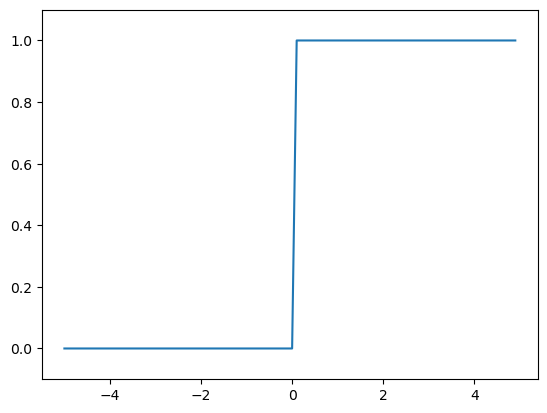

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#계단함수
def step_function(x):
    return np.array(x>0 )

x = np.arange(-5.0, 5.0, 0.1) # -0.5 ~ 5.0 사이를 0.1씩 step
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

# ReLU 함수 그래프

## ReLU 함수 수식

\begin{equation*}
h(x) = x ( x > 0)
\end{equation*}

\begin{equation*}
h(x) = 0 ( x <= 0)
\end{equation*}

In [ ]:
def relu(x):
    return np.maximum(0, x)

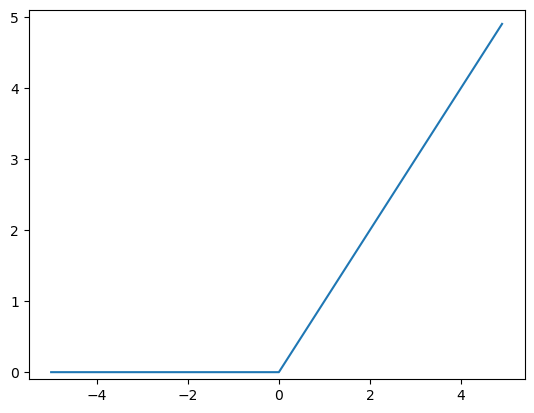

In [11]:
x = np.arange(-5.0, 5.0, 0.1) # -0.5 ~ 5.0 사이를 0.1씩 step
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5.1) # y축 범위 지정
plt.show()

# 시그모이드 함수

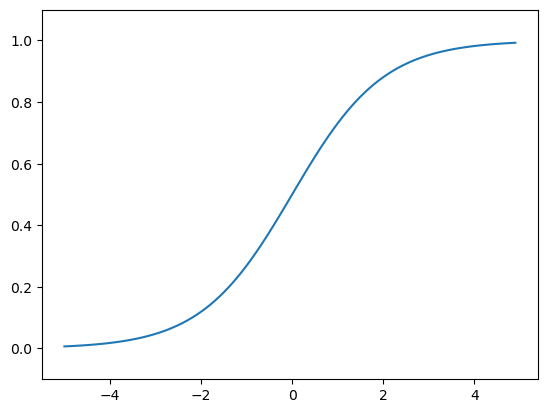

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# Tanh 함수

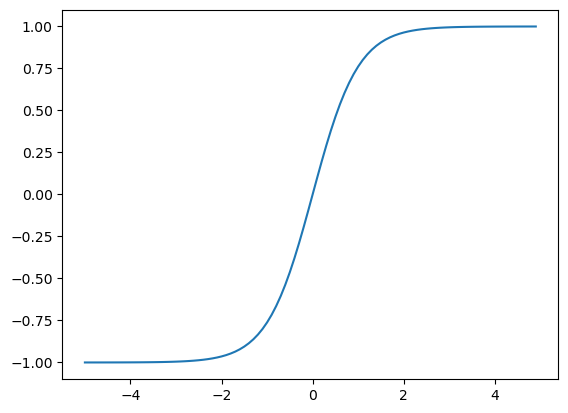

In [13]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1) # y축의 범위 지정
plt.show()

# SoftMax

1.0


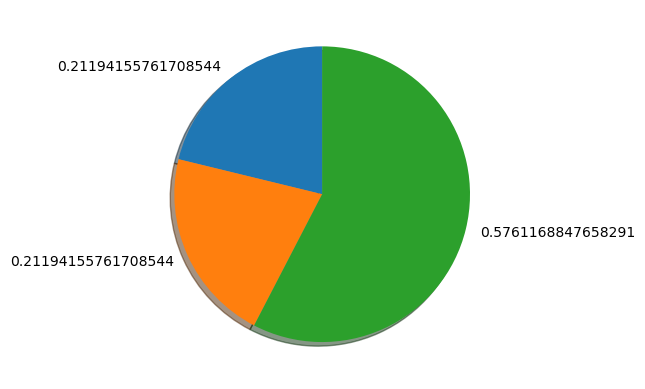

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

x = np.array([1.0,1.0,2.0])

y = softmax(x)

print(np.sum(y))

ratio = y
labels = y

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()


# 와인 데이터셋으로 인공지능 훈련시키기

In [15]:
import pandas as pd
 # 데이터 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
 # 데이터 크기 확인
print(data.shape)
 # 데이터 미리보기
print(data.head())
 # 데이터 정보 확인
print(data.info())
 # 기술 통계량 확인
print(data.describe())

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

In [18]:
print(data['quality'].unique())

[5 6 7 4 8 3]


In [19]:
# 데이터 분리
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
# 카테고리화 / 범주화  
y = y -3

In [22]:
print(y.unique())

[2 3 4 1 5 0]


In [23]:
y_encoded = to_categorical(y)

In [24]:
y_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [25]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#모델 생성
model = Sequential(
    [
        Dense(12, activation='relu', input_shape=(11,)),
        Dense(100, activation='relu'),
        Dense(100, activation='tanh'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(6, activation='softmax')]

)

c:\Users\jd421\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train_scaled, y_train, epochs = 50, validation_split=0.2)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3984 - loss: 1.5185 - val_accuracy: 0.5469 - val_loss: 1.1676
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5181 - loss: 1.1394 - val_accuracy: 0.6328 - val_loss: 1.0064
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5866 - loss: 1.0371 - val_accuracy: 0.6133 - val_loss: 0.9479
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5771 - loss: 1.0149 - val_accuracy: 0.6328 - val_loss: 0.9169
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.9805 - val_accuracy: 0.6055 - val_loss: 0.9402
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.9163 - val_accuracy: 0.6211 - val_loss: 0.9805
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6240 - loss: 0.9583 - val_accuracy: 0.6172 - val_loss: 0.9250
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6282 - loss: 0.9136 - val_accuracy: 0.6523 - val_loss